# About the dataset

The aim of the model of this notebook is to create a heart failure predictor, the dataset used is an amalgamation of five different datasets that have a conjunction on eleven different features.

# Attributes
- **Age**: age of the patient [years]
- **Sex**: sex of the patient [1: Male, 0: Female]
- **ChestPainType**: chest pain type [1: Typical Angina , 2:   Atypical Angina, 3: Non-Anginal Pain, 4: Asymptomatic]
- **Resting_BP**: resting blood pressure [mm Hg]
- **Cholesterol**: serum cholesterol [mm/dl]
- **Fasting_Blood_Sugar**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **Resting_ECG**: resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **Max_Heart_Rate**: maximum heart rate achieved [Numeric value between 60 and 202]
- **Exercise_Angina**: exercise-induced angina [1: Yes, 0: No]
- **Old_Peak**: oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: the slope of the peak exercise ST segment [1: upsloping, 2: flat, 3: downsloping]
- **Target**: output class [1: heart disease, 0: Normal]

--------

Creating a Lookup table for the attributes

In [ ]:
# A simple dictionary for looking up attributes
attribute_lookup={'Age': 'age of the patient [years]','Sex': 'sex of the patient [1: Male, 0: Female]',
'Chest_pain_Type': 'chest pain type [1: Typical Angina, 2: Atypical Angina, 3: Non-Anginal Pain, 4: Asymptomatic]',
'Resting_BP': 'resting blood pressure [mm Hg]',
'Cholesterol': 'serum cholesterol [mm/dl]',
'Fasting_Blood_Sugar': 'fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]',
'Resting_ECG': 'resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes criteria]',
'Max_Heart_Rate': 'maximum heart rate achieved [Numeric value between 60 and 202]',
'Exercise_Angina':'exercise-induced angina [1: Yes, 0: No]',
'Old_Peak': 'oldpeak = ST [Numeric value measured in depression]',
'ST_Slope': 'the slope of the peak exercise ST segment [1: upsloping, 2: flat, 3: downsloping]',
'Target': 'output class [1: heart disease, 0: Normal]'}

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Mounting Google Drive**

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls gdrive/MyDrive/Cmpe-257

'CVD dataset.csv'


In [ ]:
!cp gdrive/MyDrive/Cmpe-257/'CVD dataset.csv' ./

In [ ]:
df=pd.read_csv('CVD dataset.csv')

# Exploratory Data analysis

In [ ]:
df.head()

,Age,Sex,Chest_pain_type,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Angina,Old_Peak,ST_Slope,Target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df.shape

(1190, 12)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
Sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
Chest_pain_type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
Resting_BP,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
Cholestrol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
Fasting_Blood_Sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
Resting_ECG,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
Max_Heart_Rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
Exercise_Angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
Old_Peak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [ ]:
df.corr()['Target'].sort_values()

Max_Heart_Rate        -0.413278
Cholestrol            -0.198366
Resting_ECG            0.073059
Resting_BP             0.121415
Fasting_Blood_Sugar    0.216695
Age                    0.262029
Sex                    0.311267
Old_Peak               0.398385
Chest_pain_type        0.460127
Exercise_Angina        0.481467
ST_Slope               0.505608
Target                 1.000000
Name: Target, dtype: float64

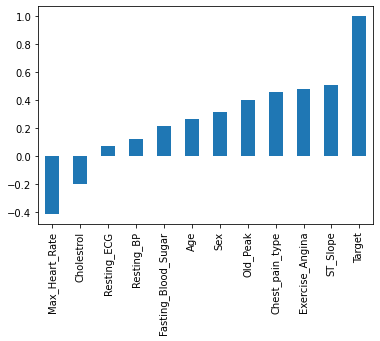

In [ ]:
df.corr()['Target'].sort_values().plot(kind='bar')

**Correlation Matrix**

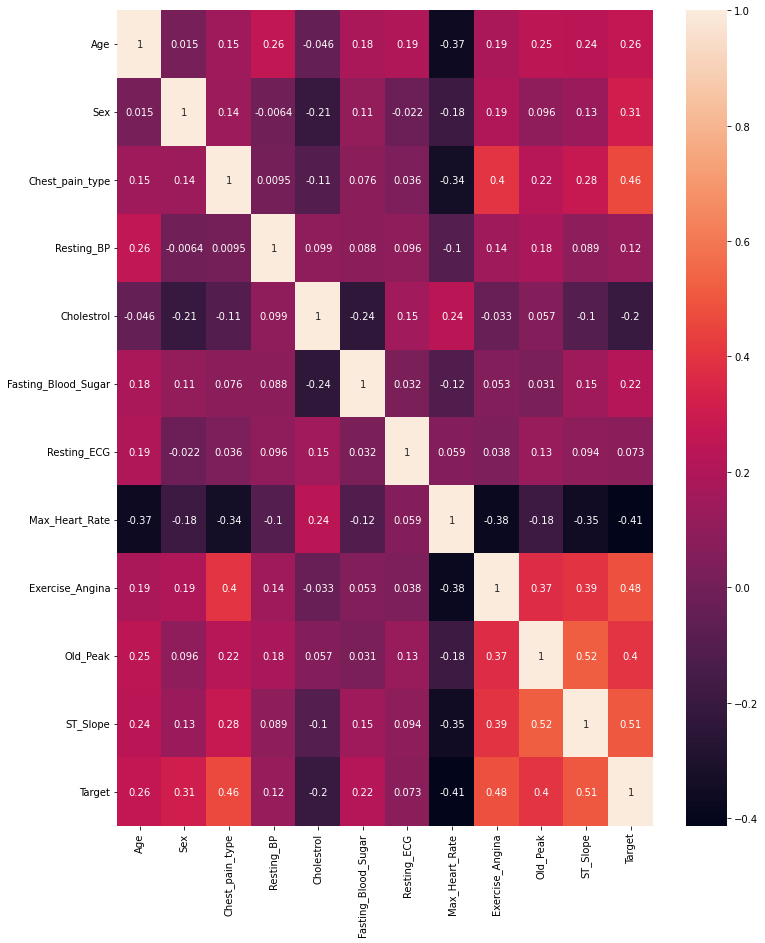

In [ ]:
plt.figure(figsize=(12,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1190 non-null   int64  
 1   Sex                  1190 non-null   int64  
 2   Chest_pain_type      1190 non-null   int64  
 3   Resting_BP           1190 non-null   int64  
 4   Cholestrol           1190 non-null   int64  
 5   Fasting_Blood_Sugar  1190 non-null   int64  
 6   Resting_ECG          1190 non-null   int64  
 7   Max_Heart_Rate       1190 non-null   int64  
 8   Exercise_Angina      1190 non-null   int64  
 9   Old_Peak             1190 non-null   float64
 10  ST_Slope             1190 non-null   int64  
 11  Target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


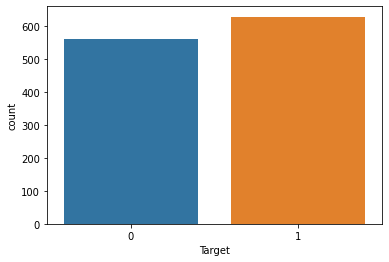

In [ ]:
sns.countplot(x='Target',data=df)

**The following figure shows a  plot of  various types of chest pain encountered in the dataset separated by Gender, where 0 represents female cases and 1 represents male cases**

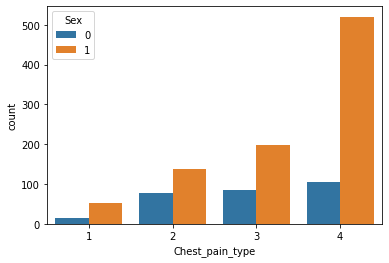

In [ ]:
sns.countplot(x='Chest_pain_type',data=df,hue='Sex')

**The following plot shows the distribution of Age across the Sex feature**

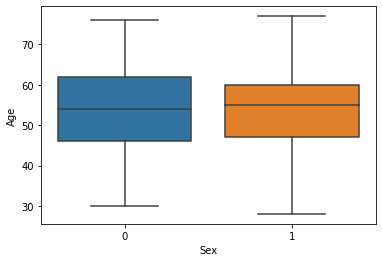

In [ ]:
sns.boxplot(x='Sex',y='Age',data=df)

**The plot in the figure below shows interesting information about the trends of heart rate of people having CVD and not having CVD separated by Gender. It can be observed that Males who have suffered from CVD tend to have a lower Heart Beat rate than their female counterparts who also have CVDs.**

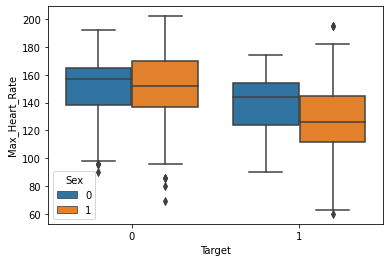

In [ ]:
sns.boxplot(x='Target',y='Max_Heart_Rate',data=df,hue='Sex')

**Scatter plot of Heart Rate Vs. Resting BP sepaerated by Age and Gender**

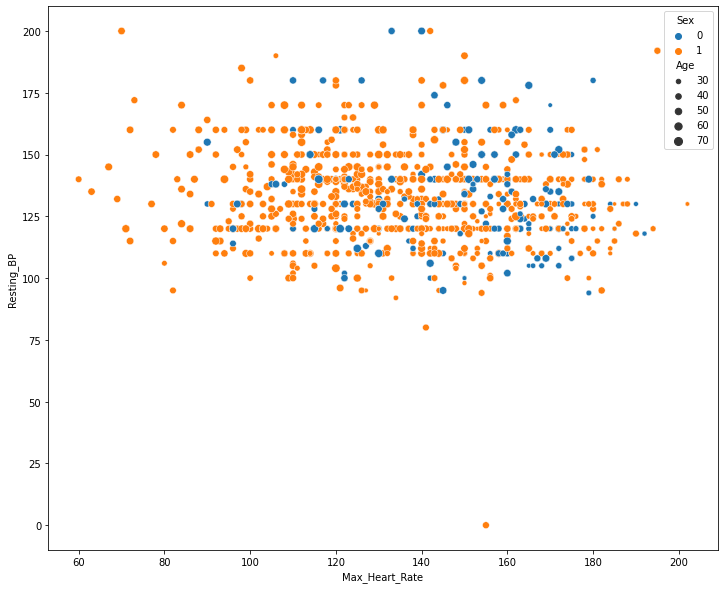

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Max_Heart_Rate',y='Resting_BP',data=df,hue='Sex',size='Age')

**Distribution of the target with repect to age**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


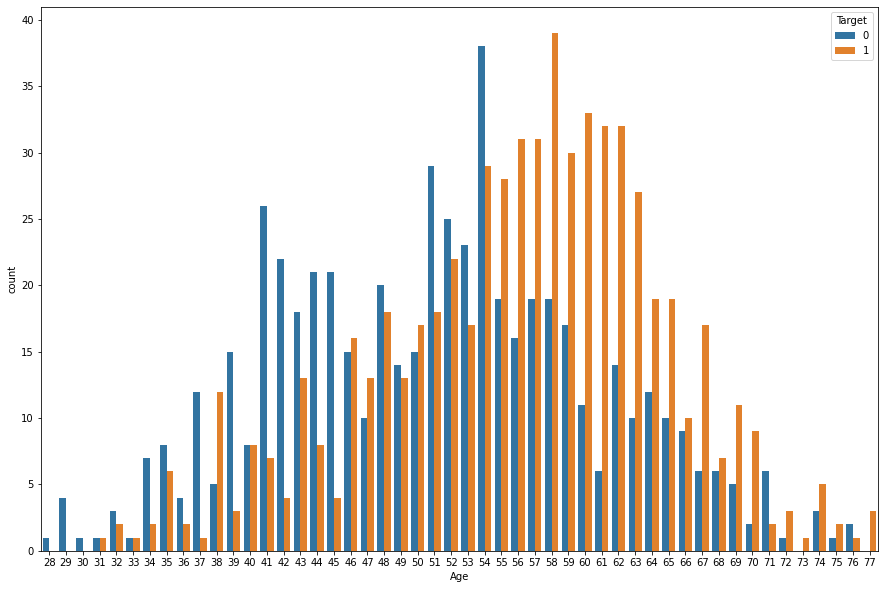

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df['Age'],hue=df['Target'])

In [ ]:
attribute_lookup

{'Age': 'age of the patient [years]',
 'Sex': 'sex of the patient [1: Male, 0: Female]',
 'Chest_pain_Type': 'chest pain type [1: Typical Angina, 2: Atypical Angina, 3: Non-Anginal Pain, 4: Asymptomatic]',
 'Resting_BP': 'resting blood pressure [mm Hg]',
 'Cholesterol': 'serum cholesterol [mm/dl]',
 'Fasting_Blood_Sugar': 'fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]',
 'Resting_ECG': 'resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes criteria]',
 'Max_Heart_Rate': 'maximum heart rate achieved [Numeric value between 60 and 202]',
 'Exercise_Angina': 'exercise-induced angina [1: Yes, 0: No]',
 'Old_Peak': 'oldpeak = ST [Numeric value measured in depression]',
 'ST_Slope': 'the slope of the peak exercise ST segment [1: upsloping, 2: flat, 3: downsloping]',
 'Target': 'output class [1: heart disease, 0: Nor

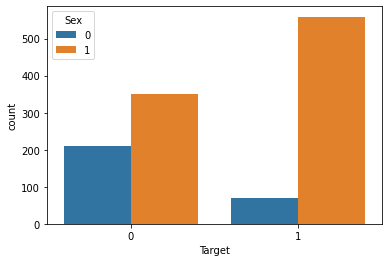

In [ ]:
sns.countplot(x=df['Target'],data=df,hue='Sex')


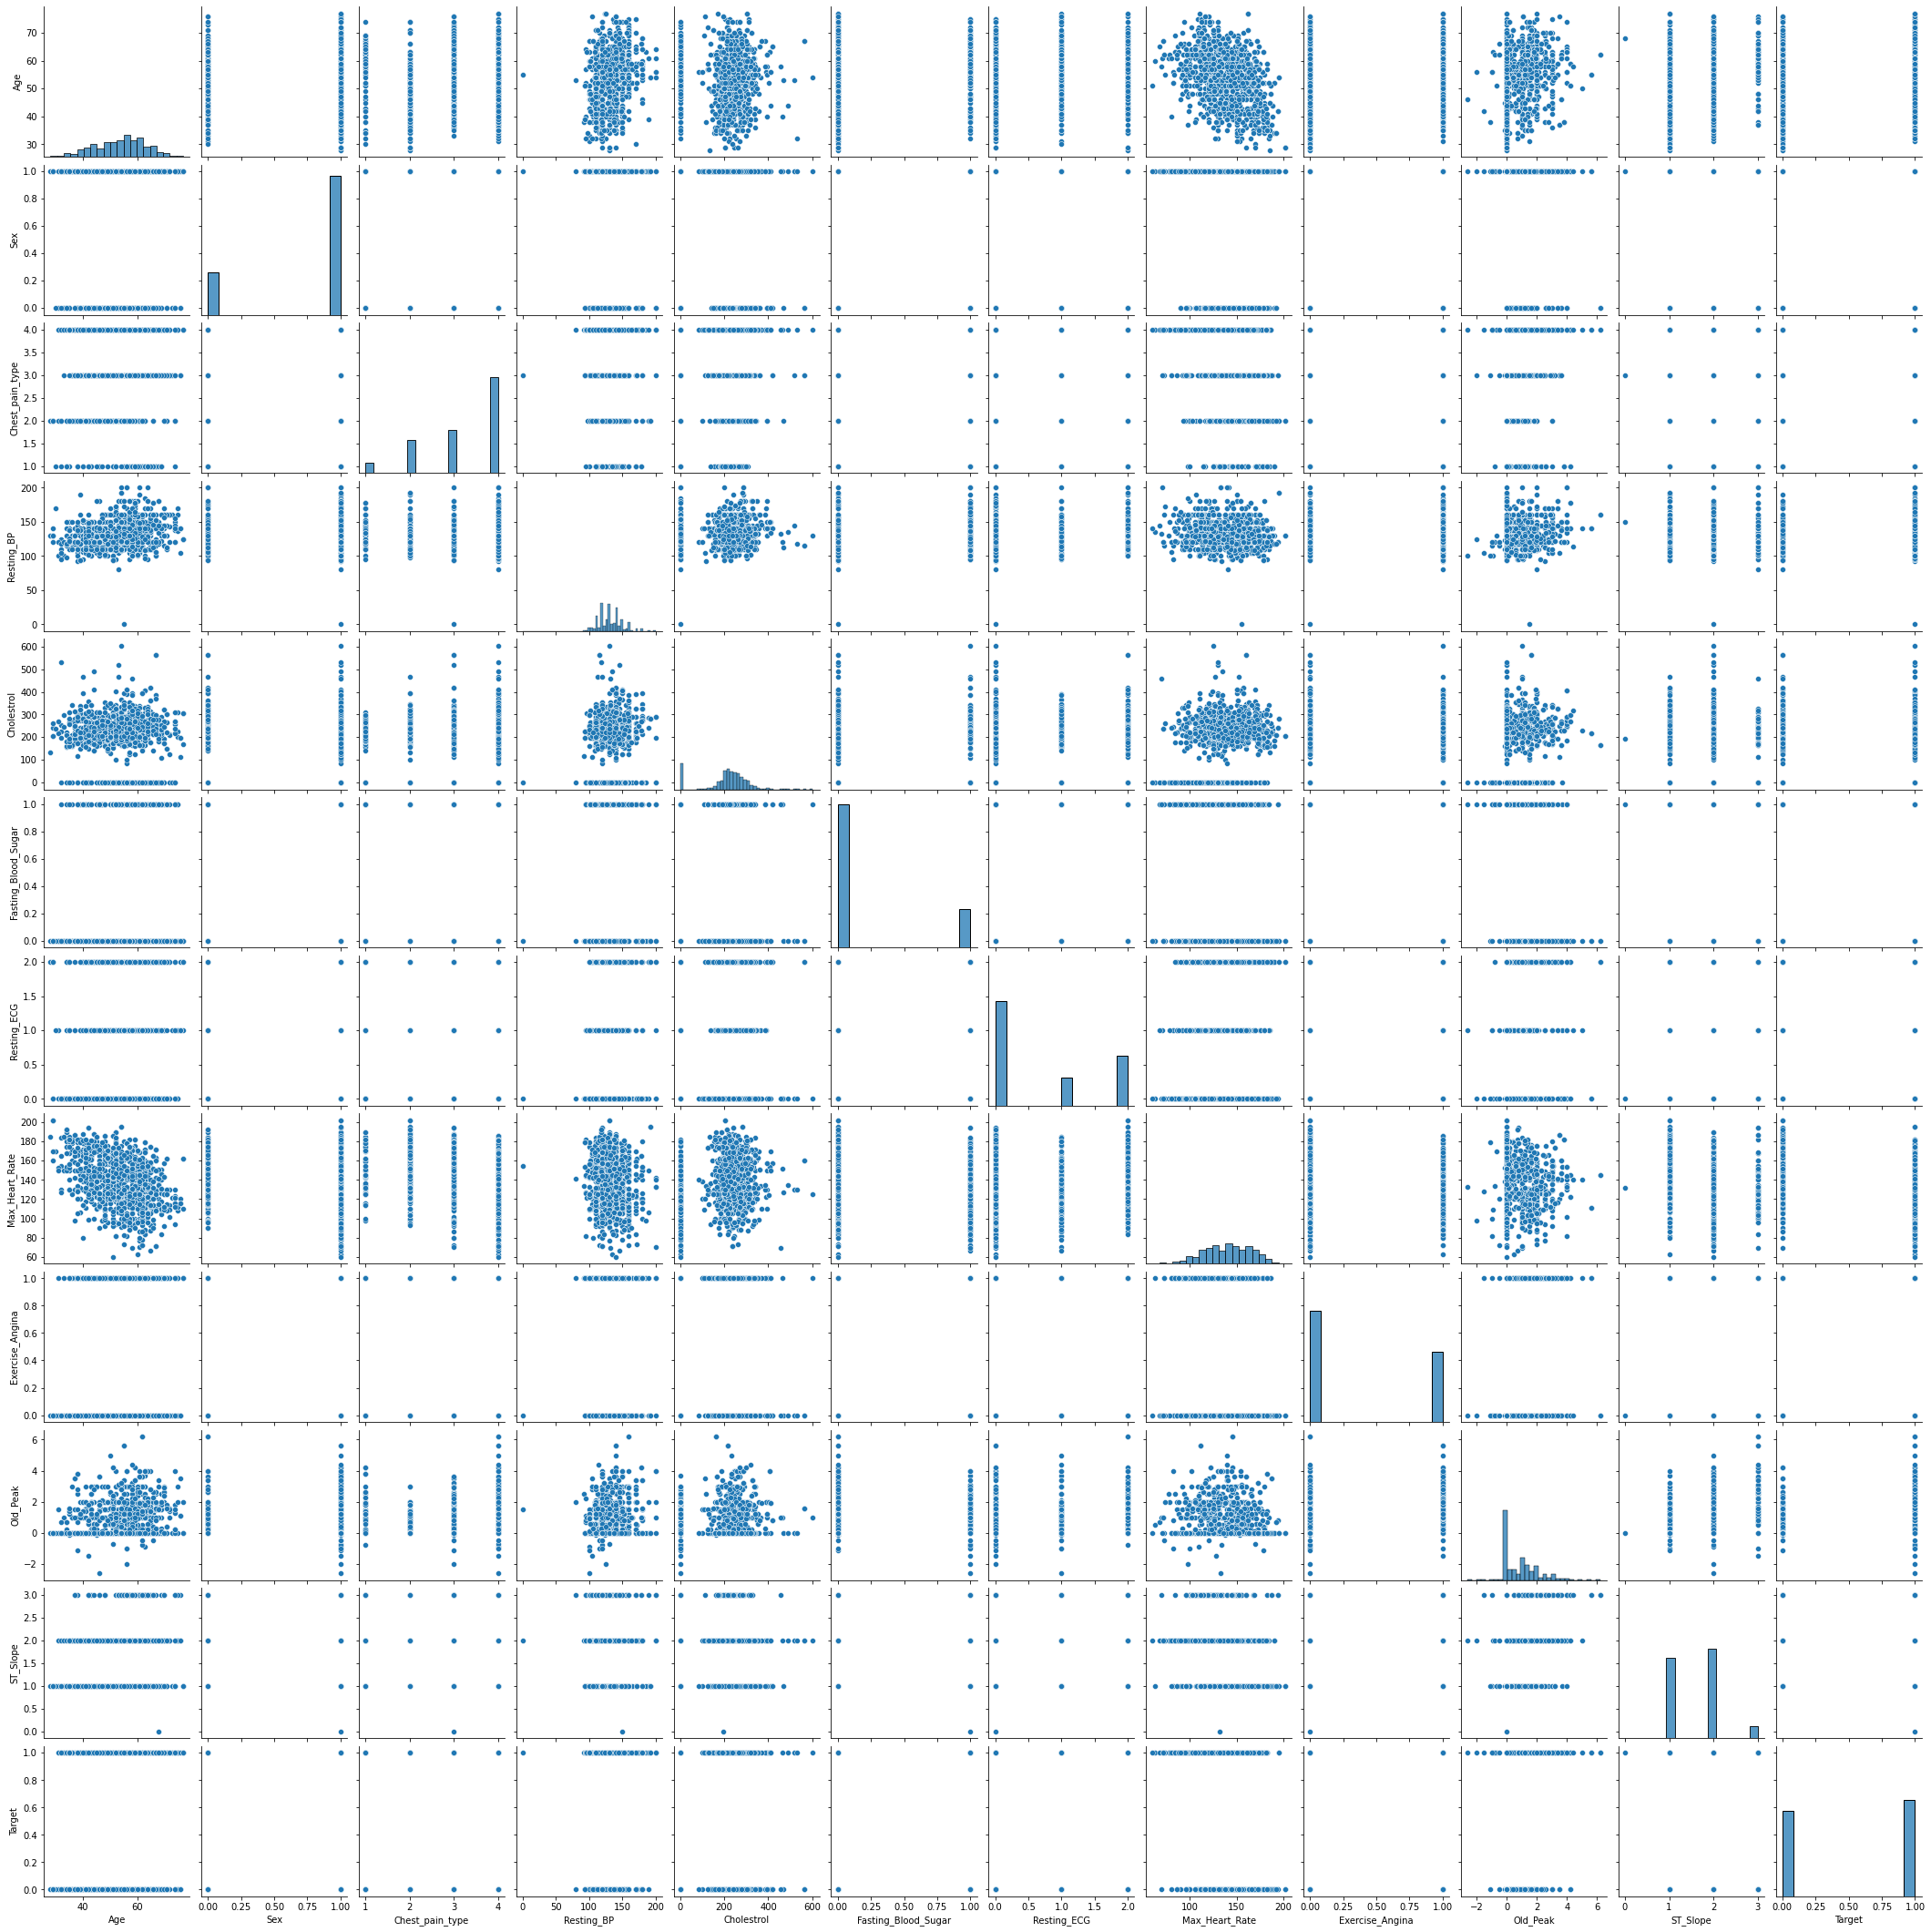

In [ ]:
sns.pairplot(df)

# Making the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Flatten,InputLayer
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('Target',axis=1).values

In [ ]:
y=df['Target'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,

-------------

# Evaluating Metrics

In [ ]:
test_predictions=pd.Series(predictions.reshape(357,))

In [ ]:
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])

In [ ]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns=['Test True Y','Model_predictions']
pred_df

,Test True Y,Model_predictions
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
352,0,0
353,1,1
354,1,1
355,1,1


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

AxesSubplot(0.125,0.125;0.62x0.755)


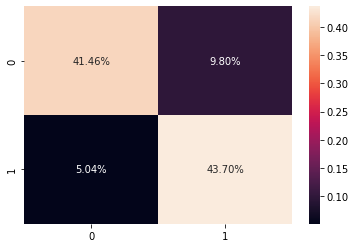

In [ ]:
cf_mat=confusion_matrix(y_test,predictions)
print(sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, fmt='.2%'))

AxesSubplot(0.125,0.125;0.62x0.755)


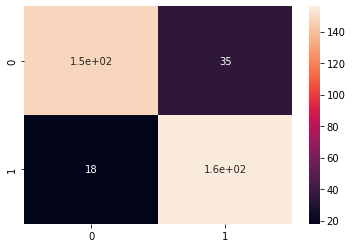

In [ ]:
print(sns.heatmap(cf_mat, annot=True))

In [ ]:
print(cf_mat)

[[148  35]
 [ 18 156]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       183
           1       0.82      0.90      0.85       174

    accuracy                           0.85       357
   macro avg       0.85      0.85      0.85       357
weighted avg       0.86      0.85      0.85       357

